In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
# Specific for animation
# Can be put in a separate script
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import cmocean

# Thanks to Pavel for this function :) 
def create_animation(fun, idx, filename='my-animation.gif', dpi=200, FPS=18, loop=0):
    '''
    See https://pythonprogramming.altervista.org/png-to-gif/
    fun(i) - a function creating one snapshot, has only one input:
        - number of frame i
    idx - range of frames, i in idx
    FPS - frames per second
    filename - animation name
    dpi - set 300 or so to increase quality
    loop - number of repeats of the gif
    '''
    frames = []
    for i in idx:
        fun(i)
        plt.savefig('.frame.png', dpi=dpi, bbox_inches='tight')
        plt.close()
        frames.append(Image.open('.frame.png').convert('RGB'))
        print(f'Frame {i} is created', end='\r')
    os.system('rm .frame.png')
    # How long to persist one frame in milliseconds to have a desired FPS
    duration = 1000 / FPS
    print(f'Animation at FPS={FPS} will last for {len(idx)/FPS} seconds')
    frames[0].save(
        filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=loop)


In [3]:
# a bit more human readable params
hour = 60.*60.
day = 24.*hour 
year = 360.*day

eddy_model = pyqg.QGModel(nx=64, dt=12*hour, tmax=10*year, tavestart=4*year)

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [4]:
def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=5*day): # you can choose whatever frequency you want here. 
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_high_res = generate_snapshots(eddy_model) # Can save this dataset to zarr for later use.

INFO: Step: 1000, Time: 4.32e+07, KE: 3.32e-05, CFL: 0.104
INFO: Step: 2000, Time: 8.64e+07, KE: 4.90e-04, CFL: 0.592
INFO: Step: 3000, Time: 1.30e+08, KE: 5.36e-04, CFL: 0.547
INFO: Step: 4000, Time: 1.73e+08, KE: 5.20e-04, CFL: 0.591
INFO: Step: 5000, Time: 2.16e+08, KE: 5.23e-04, CFL: 0.604
INFO: Step: 6000, Time: 2.59e+08, KE: 5.04e-04, CFL: 0.550
INFO: Step: 7000, Time: 3.02e+08, KE: 5.05e-04, CFL: 0.783


In [5]:
def plot_fun(idT): 
    eddy_high_res.q.isel(time=idT).isel(lev=0).plot(vmin=-3e-5)
    plt.title(str(eddy_high_res.time.isel(time=idT).values/day)+' days')

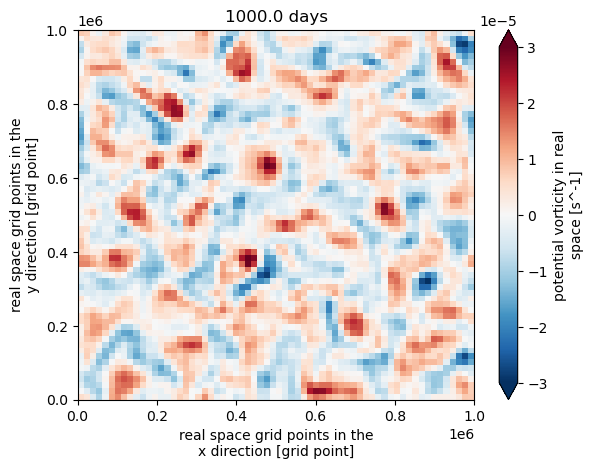

In [6]:
plot_fun(200)

In [7]:
create_animation(plot_fun, range(0, 361), 'PVmov.gif', dpi=100)

Animation at FPS=18 will last for 20.055555555555557 seconds
